In [1]:
# Load the Tidyverse

library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Use the `pull` function to extract the `class` column from the `mpg` data set. Capture this column into a variable named `class_col`.

In [2]:
class_col = mpg |> pull(class)

Run the code below to turn `class_col` into a factor and view the default levels.

In [3]:
class_col |> factor() |> levels()

[1] "2seater"    "compact"    "midsize"    "minivan"    "pickup"    
[6] "subcompact" "suv"

Let's turn `class_col` into a factor but manipulate the order of the levels with `forcats`!

First, use the `table` command to count the frequency of each value in `class_col`.

In [4]:
class_col |> table()

class_col
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

Pipe `class_col` into the `fct_infreq` function to turn `class_col` into a factor and order the levels by ☝️frequency. Are the levels in the order you expected?

In [5]:
class_col |> fct_infreq()

[1] compact    compact    compact    compact    compact    compact   
  [7] compact    compact    compact    compact    compact    compact   
 [13] compact    compact    compact    midsize    midsize    midsize   
 [19] suv        suv        suv        suv        suv        2seater   
 [25] 2seater    2seater    2seater    2seater    suv        suv       
 [31] suv        suv        midsize    midsize    midsize    midsize   
 [37] midsize    minivan    minivan    minivan    minivan    minivan   
 [43] minivan    minivan    minivan    minivan    minivan    minivan   
 [49] pickup     pickup     pickup     pickup     pickup     pickup    
 [55] pickup     pickup     pickup     suv        suv        suv       
 [61] suv        suv        suv        suv        pickup     pickup    
 [67] pickup     pickup     pickup     pickup     pickup     pickup    
 [73] pickup     pickup     suv        suv        suv        suv       
 [79] suv        suv        suv        suv        suv        pickup    
 [85] pickup     pickup     pickup     pickup     pickup     pickup    
 [91] subcompact subcompact subcompact subcompact subcompact subcompact
 [97] subcompact subcompact subcompact subcompact subcompact subcompact
[103] subcompact subcompact subcompact subcompact subcompact subcompact
[109] midsize    midsize    midsize    midsize    midsize    midsize   
[115] midsize    subcompact subcompact subcompact subcompact subcompact
[121] subcompact subcompact suv        suv        suv        suv       
[127] suv        suv        suv        suv        suv        suv       
[133] suv        suv        suv        suv        suv        suv       
[139] suv        suv        suv        compact    compact    midsize   
[145] midsize    midsize    midsize    midsize    midsize    midsize   
[151] suv        suv        suv        suv        midsize    midsize   
[157] midsize    midsize    midsize    suv        suv        suv       
[163] suv        suv        suv        subcompact subcompact subcompact
[169] subcompact compact    compact    compact    compact    suv       
[175] suv        suv        suv        suv        suv        midsize   
[181] midsize    midsize    midsize    midsize    midsize    midsize   
[187] compact    compact    compact    compact    compact    compact   
[193] compact    compact    compact    compact    compact    compact   
[199] suv        suv        pickup     pickup     pickup     pickup    
[205] pickup     pickup     pickup     compact    compact    compact   
[211] compact    compact    compact    compact    compact    compact   
[217] compact    compact    compact    compact    compact    subcompact
[223] subcompact subcompact subcompact subcompact subcompact midsize   
[229] midsize    midsize    midsize    midsize    midsize    midsize   
Levels: suv compact midsize subcompact pickup minivan 2seater

Group the low frequency levels into an "Other" category using `fct_lump`. Set the `n` argument to **five**.

In [6]:
class_col |> fct_lump(n = 5) |> levels()

[1] "compact"    "midsize"    "pickup"     "subcompact" "suv"       
[6] "Other"

## Bonus

Can you group low frequency values and sort the levels by frequency?

In [7]:
class_col |> fct_lump(n = 5) |> fct_infreq() |> levels()

[1] "suv"        "compact"    "midsize"    "subcompact" "pickup"    
[6] "Other"

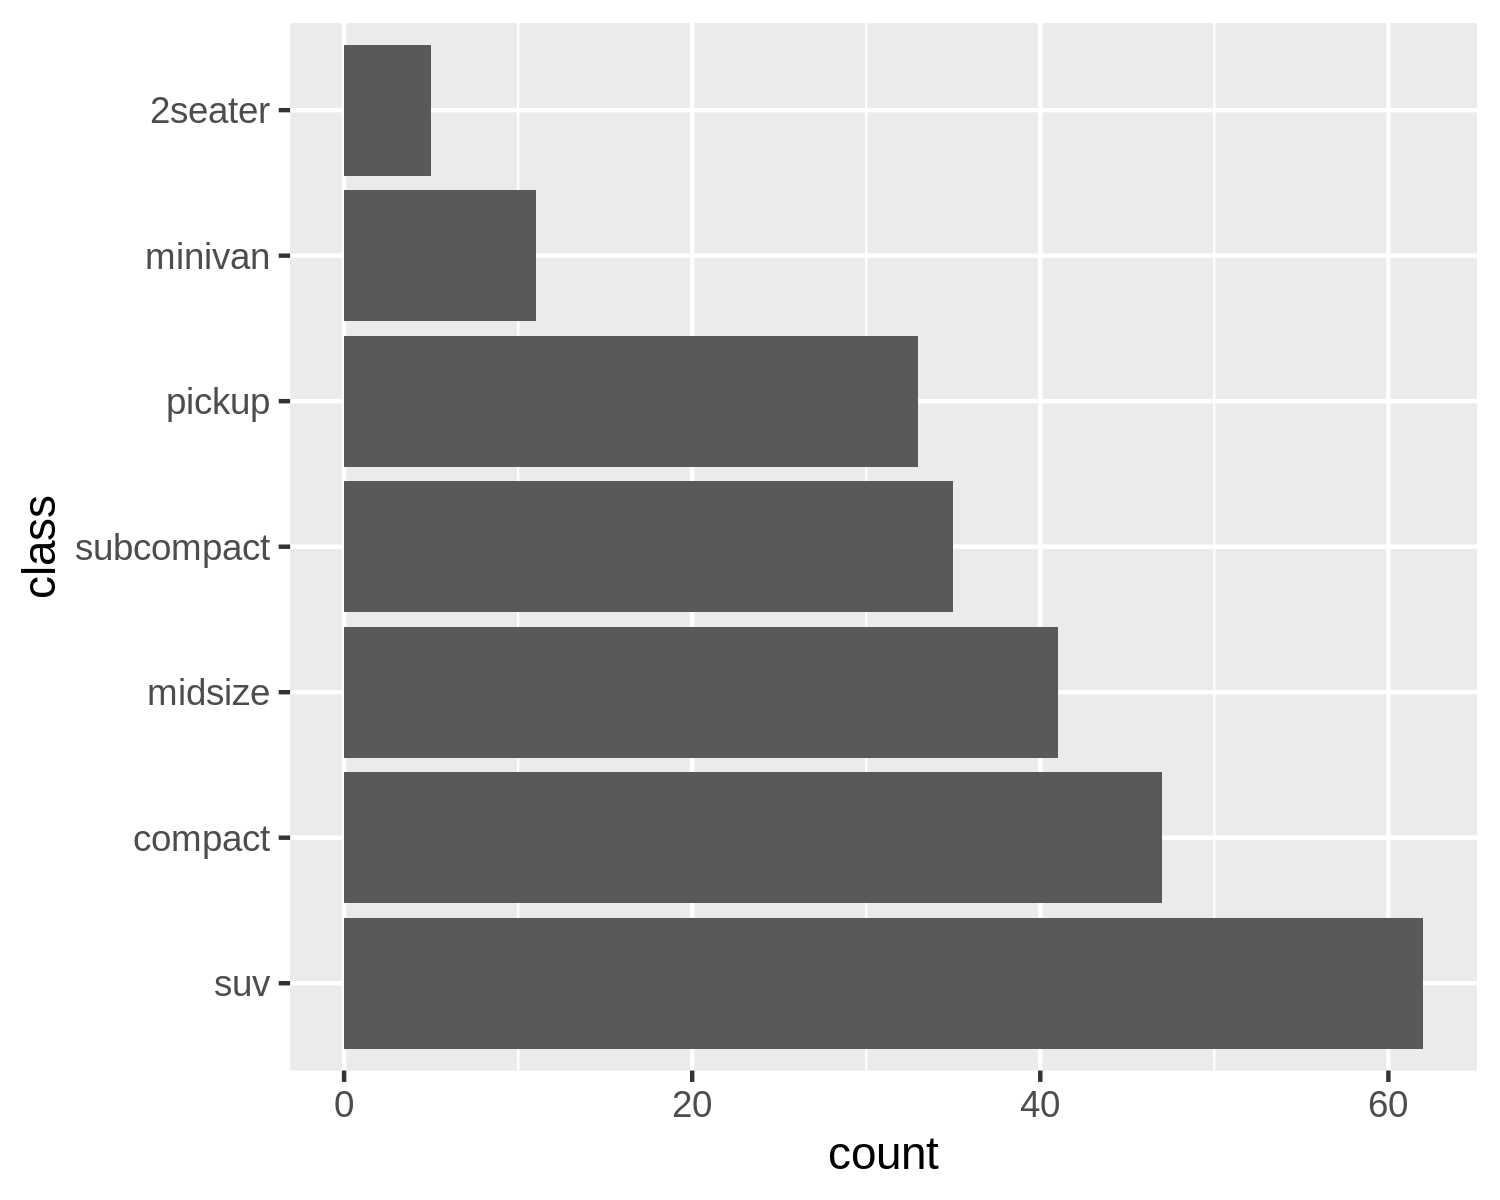

In [9]:
mpg3 = mpg |> 
    group_by(class) |>
    mutate (class_freq = n()) |>
    ungroup() |>
    arrange(desc(class_freq)) |>
    mutate(class = fct_inorder(class))

p = ggplot(mpg3, aes(y = class)) + geom_bar()
p